In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats # to plot qq plot

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



In [5]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
#find missing value if any fill them
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:

df['Age']=df['Age'].fillna(df['Age'].mean())
df.fillna({'Age':df['Age'].mean()},inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
#train=x, test=y
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,
                                                  random_state=42)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13156\2852733353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


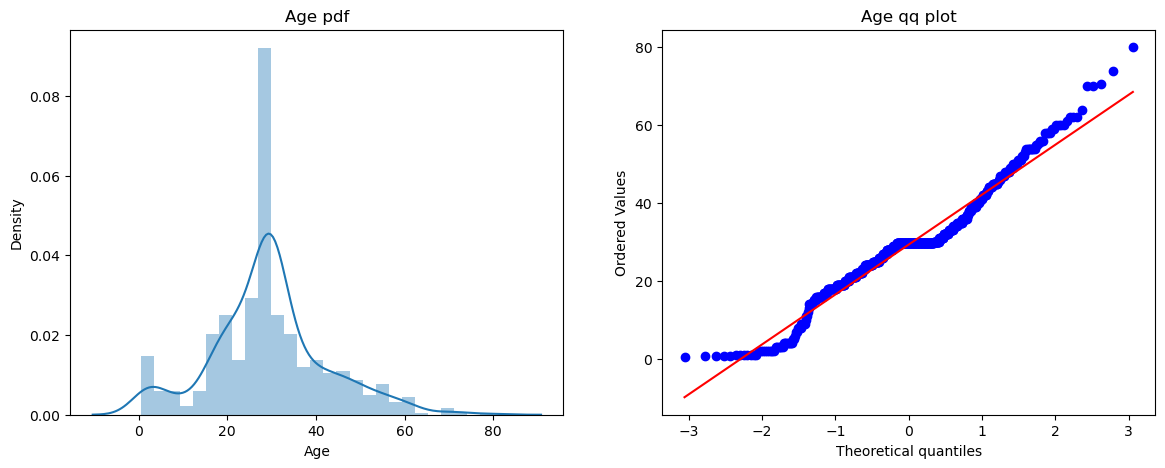

In [22]:
#plot qq plot and pd- prob den func
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age qq plot')

plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13156\2321757705.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


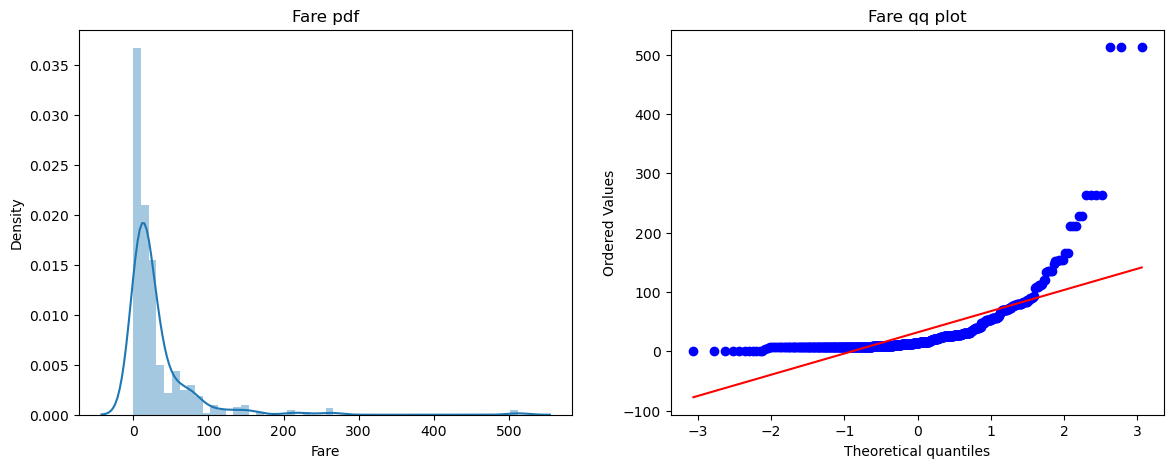

In [23]:
#plot qq plot and pd- prob den func for fare
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare qq plot')

plt.show()

In [24]:
# fare doesn't need it for now, but we'll apply log transform on both
clf = LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LogReg",accuracy_score(y_test,y_pred))
print("Accuracy DecTree",accuracy_score(y_test,y_pred1))

Accuracy LogReg 0.6529850746268657
Accuracy DecTree 0.667910447761194


In [26]:
trf=FunctionTransformer(func=np.log1p)

In [28]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [30]:
#predicting on coluns after log transform
clf = LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LogReg",accuracy_score(y_test,y_pred))
print("Accuracy DecTree",accuracy_score(y_test,y_pred1))

Accuracy LogReg 0.6791044776119403
Accuracy DecTree 0.6828358208955224


## acc_sc for log reg incr from 65 to 67
## acc_sc for dec tree incr from 66 to 68

In [31]:
# cross val
X_transformed = trf.fit_transform(X)

clf= LogisticRegression()
clf2= DecisionTreeClassifier()

print("logreg",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=8)))
print("logreg",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=8)))

logreg 0.6780385296010296
logreg 0.6487089768339769


## acc after cross val remained same in logreg while decreased by 4% in dectree

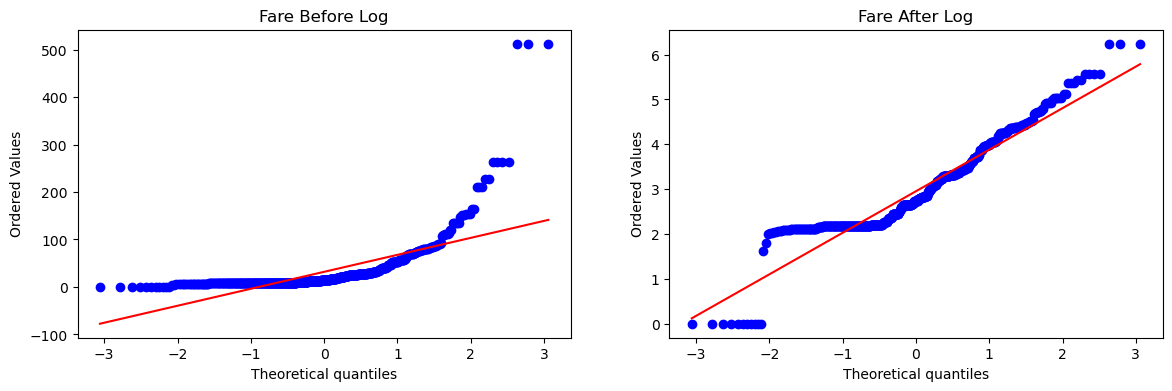

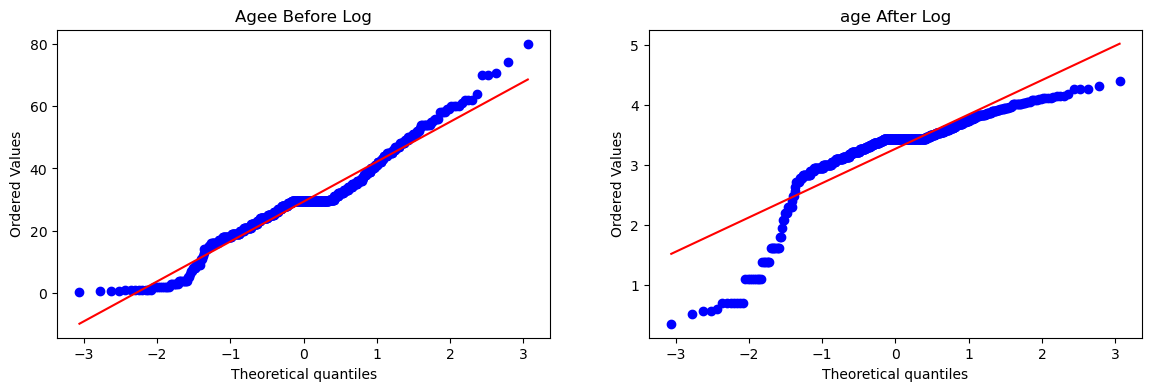

In [33]:
#fare befor and after log


plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

#age befor and after log
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Agee Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('age After Log')

plt.show()

In [42]:
#rather applying on both age and fare just do on fare

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

_test_transformed2 = trf2.transform(X_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2)) 

Accuracy LR 0.664179104477612
Accuracy DT 0.6791044776119403


In [43]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))


LR 0.6712609238451936
DT 0.6666791510611735


In [38]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


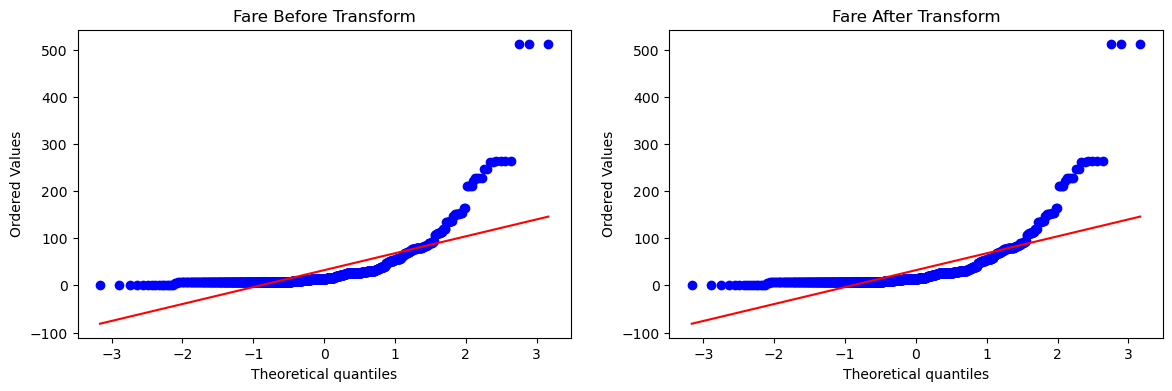

In [39]:
#we can apply different transformation
apply_transform(lambda x :x)

Accuracy 0.6431335830212235


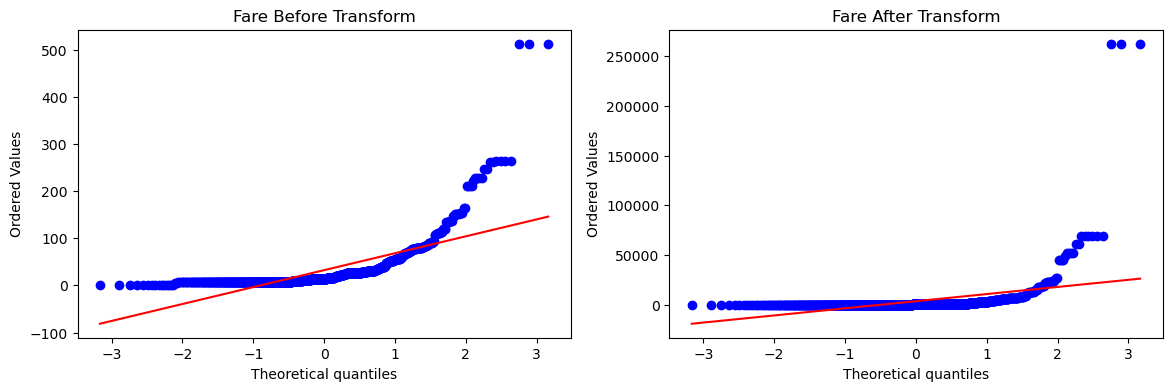

In [47]:
apply_transform(lambda x: x**2)

Accuracy 0.6262796504369538


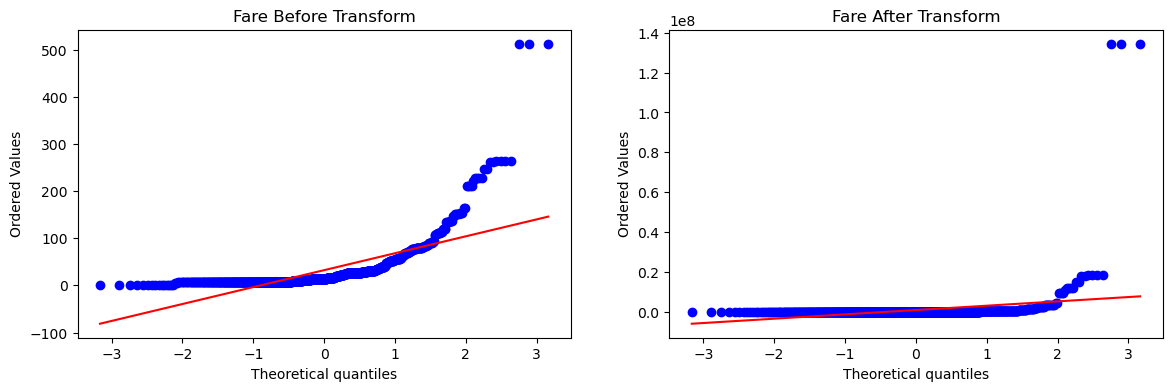

In [48]:
apply_transform(lambda x: x**3)

Accuracy 0.6589013732833957


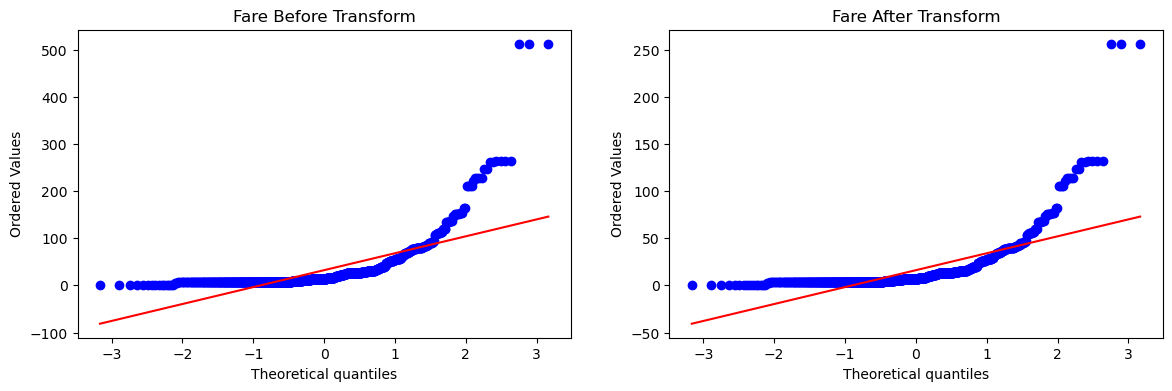

In [49]:
apply_transform(lambda x: x**1/2)

Accuracy 0.616167290886392


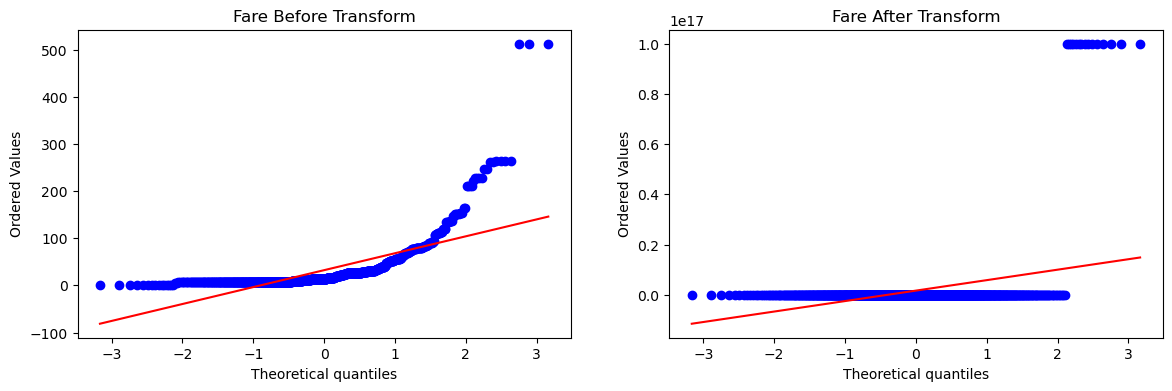

In [54]:
apply_transform(lambda x: 1/(x+0.00000000000000001))

Accuracy 0.6195131086142323


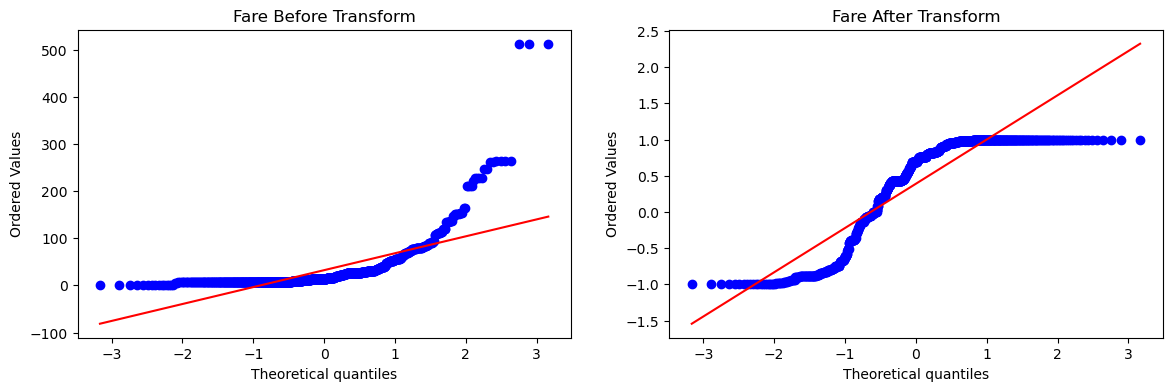

In [55]:
apply_transform(np.sin)